In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#캘리포니아 데이터 불러오기
from sklearn import datasets
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- MedInc: 중위소득
- HouseAge: 건축물 중위연령
- AveRooms: 방 개수
- AveBedrms: 침실 개수
- Population: 인구
- AveOccup: 주택점유율
- Latitude: 경도
- Longtitude: 위도

### 방의 개수 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x24c97a1e350>,
 'caps': [<matplotlib.lines.Line2D at 0x24c97a1fb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c979df810>],
 'medians': [<matplotlib.lines.Line2D at 0x24c97a21210>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c97a1f590>],
 'means': []}

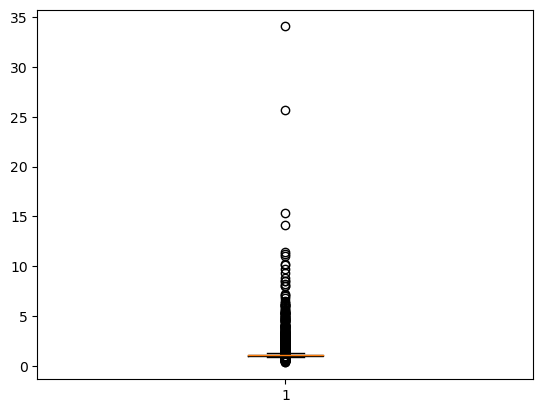

In [6]:
plt.boxplot(df['AveBedrms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24c9704a890>,
 'caps': [<matplotlib.lines.Line2D at 0x24c9704be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c97049c50>],
 'medians': [<matplotlib.lines.Line2D at 0x24c97055450>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c96fbdf10>],
 'means': []}

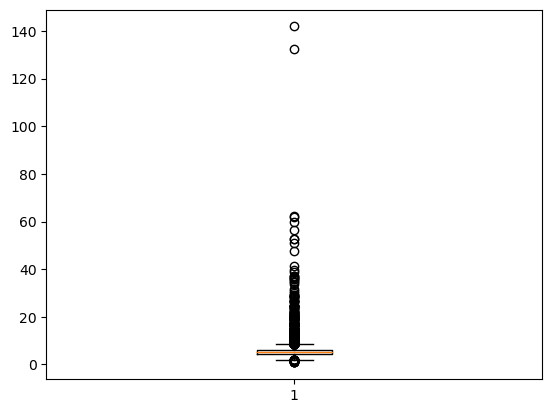

In [5]:
plt.boxplot(df['AveRooms'])

In [9]:
df[df['AveBedrms']>20]['target']

1914    5.00001
1979    1.62500
Name: target, dtype: float64

In [20]:
df[df['AveRooms']>120]['target']
#boxplot에서 'AveBedrms'와 'AveRooms'의 상단에 표시된 2개의 데이터는 같은 데이터임을 알 수 있음.
#한 개는 가장 높은 집값, 한 개는 평균 이하의 집값임.

1914    5.00001
1979    1.62500
Name: target, dtype: float64

In [22]:
df['target'].mean()

2.068558169089147

In [26]:
df.iloc[1979, :]

MedInc          4.625000
HouseAge       34.000000
AveRooms      132.533333
AveBedrms      34.066667
Population     36.000000
AveOccup        2.400000
Latitude       38.800000
Longitude    -120.080000
target          1.625000
Name: 1979, dtype: float64

In [27]:
df.iloc[1914, :]

MedInc          1.875000
HouseAge       33.000000
AveRooms      141.909091
AveBedrms      25.636364
Population     30.000000
AveOccup        2.727273
Latitude       38.910000
Longitude    -120.100000
target          5.000010
Name: 1914, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21fb891dd50>,
 'caps': [<matplotlib.lines.Line2D at 0x21fb8844c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x21fb894a950>],
 'medians': [<matplotlib.lines.Line2D at 0x21fb88a4050>],
 'fliers': [<matplotlib.lines.Line2D at 0x21fb8936890>],
 'means': []}

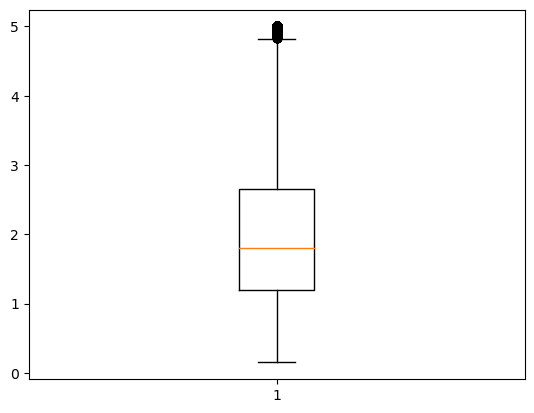

In [28]:
plt.boxplot(df['target'])

In [33]:
df_high = df[df['target']>4]
df_low = df[df['target']<=4]

Text(0.5, 1.0, 'low_income')

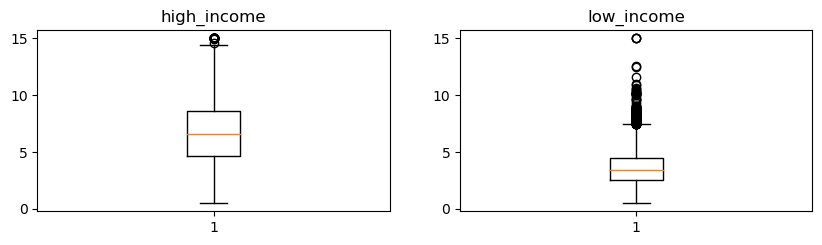

In [37]:
fig = plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.boxplot(df_high['MedInc'])
plt.title('high_income')


plt.subplot(3,2,2)
plt.boxplot(df_low['MedInc'])
plt.title('low_income')

#주택가격에 따른 income의 boxplot을 확인해보면 df_high 그룹이 더 높은 income 분포를 나타냄.
#소득과 주택가격은 비례관계라는 것을 알 수 있음